In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_percentage_error)
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [54]:
data = pd.read_csv("../../Data/Fangyou_data/Cleaned/combined_non_filled_preprocessed.csv")

In [55]:
#fluxes = data.drop(columns=["Source_Name", "Total_flux", "Peak_flux", "S_Code", 
#                            "EBV", "Z_BEST", "Mass_median", "Mass_l68", 
#                            "Mass_u68", "AGN_final", "RadioAGN_final", 
#                            "Classification", "Radio_excess", "AGNfrac_af", 
 #                           "AGNfrac_af_16", "AGNfrac_cg_s_16", "Source"])
fluxes = data.drop(columns=["Source_Name", "S_Code", 
                            "EBV", "AGN_final", "RadioAGN_final", 
                            "Classification", "Radio_excess", "AGNfrac_af", 
                            "AGNfrac_af_16", "AGNfrac_cg_s_16", "Source"])

In [56]:
fluxes.isna().sum()

Total_flux                 0
Peak_flux                  0
FUV_flux_corr          31308
NUV_flux_corr          19450
u_flux_corr             7724
Bw_flux_corr           60465
R_flux_corr            60236
I_flux_corr            59933
z_flux_corr             6960
z_Subaru_flux_corr     61272
y_flux_corr            32610
J_flux_corr            10216
H_flux_corr            60312
K_flux_corr            14495
Ks_flux_corr           60365
ch1_flux_corr          59881
ch2_flux_corr          59880
ch3_flux_corr          59984
ch4_flux_corr          59990
F_MIPS_24               1342
F_PACS_100               827
F_PACS_160               827
F_SPIRE_250              554
F_SPIRE_350              554
F_SPIRE_500              554
Z_BEST                     0
Mass_median            34343
Mass_l68               34743
Mass_u68               34806
g_flux_corr            20263
r_flux_corr            19476
i_flux_corr            47802
g_hsc_flux_corr        49458
r_hsc_flux_corr        49390
i_hsc_flux_cor

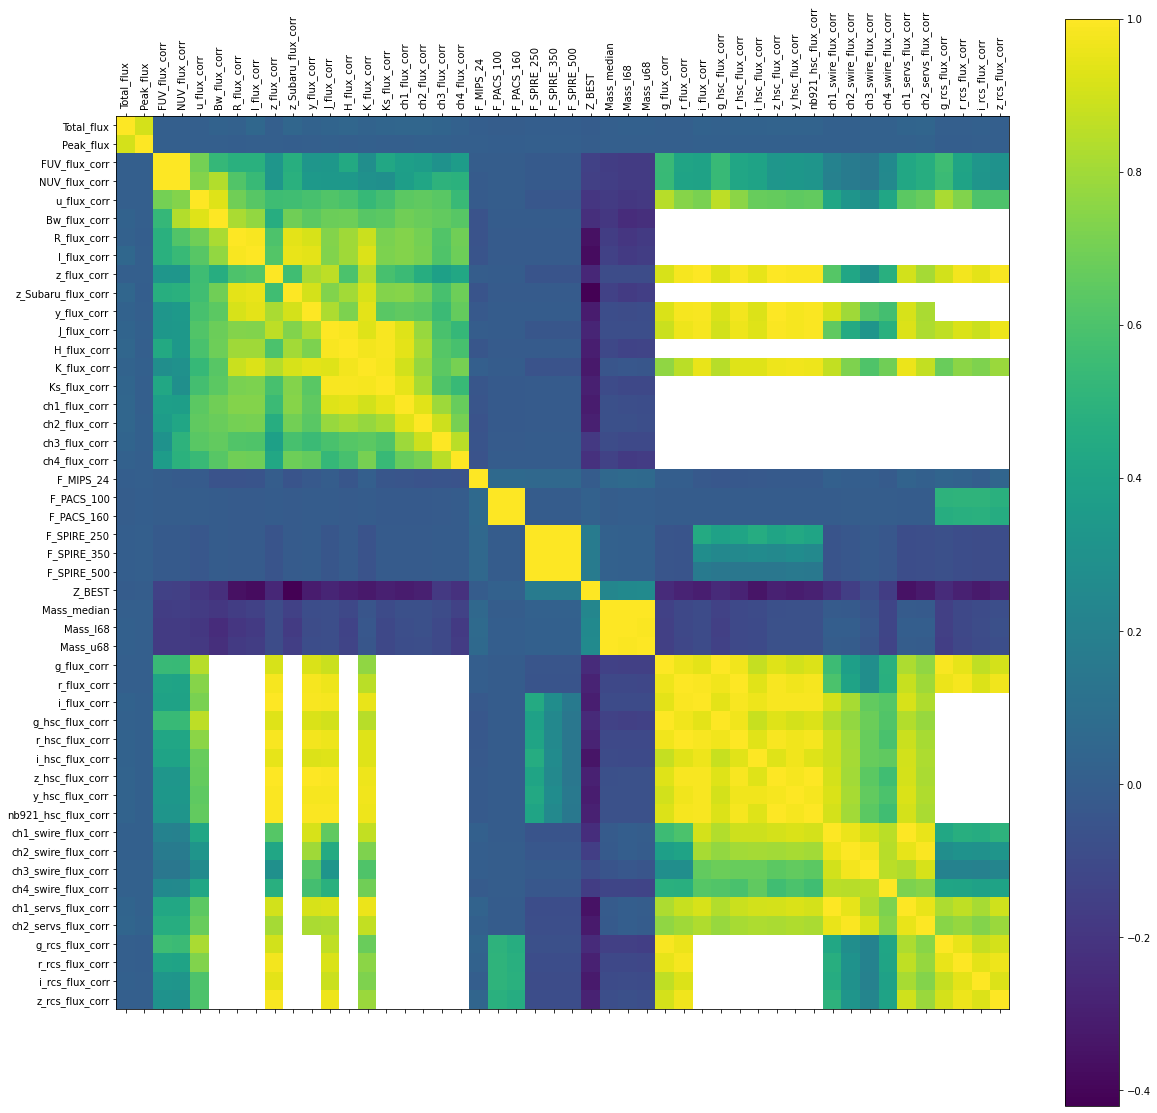

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))
corr = fluxes.corr()
corr_plot = ax.matshow(corr)
plt.colorbar(corr_plot)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [18]:
for column in fluxes.columns:
    value = corr[column].sort_values(ascending=False)[1:5]
    print(column, ":")
    print(value)
    print("-----------------")

FUV_flux_corr :
NUV_flux_corr      0.999212
u_flux_corr        0.700935
g_rcs_flux_corr    0.556503
g_flux_corr        0.543644
Name: FUV_flux_corr, dtype: float64
-----------------
NUV_flux_corr :
FUV_flux_corr    0.999212
Bw_flux_corr     0.839083
u_flux_corr      0.736146
R_flux_corr      0.613601
Name: NUV_flux_corr, dtype: float64
-----------------
u_flux_corr :
Bw_flux_corr       0.929426
g_hsc_flux_corr    0.860494
g_flux_corr        0.846588
g_rcs_flux_corr    0.818137
Name: u_flux_corr, dtype: float64
-----------------
Bw_flux_corr :
u_flux_corr      0.929426
NUV_flux_corr    0.839083
R_flux_corr      0.821411
I_flux_corr      0.767713
Name: Bw_flux_corr, dtype: float64
-----------------
R_flux_corr :
I_flux_corr           0.988448
z_Subaru_flux_corr    0.940531
y_flux_corr           0.916460
K_flux_corr           0.888103
Name: R_flux_corr, dtype: float64
-----------------
I_flux_corr :
R_flux_corr           0.988448
z_Subaru_flux_corr    0.954944
y_flux_corr           0.9406

In [59]:
test = [1,2,3]
print(test[0:5])

[1, 2, 3]


In [20]:
def evaluate_model(model, test_features, test_labels):
    """Return the metrics of the predictions"""
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = mean_absolute_percentage_error(test_labels, predictions)
    rmse = mean_squared_error(test_labels, predictions, squared=False)
    r2_score = model.score(test_features, test_labels)
    print('Model Performance %s' % model)
    print('Average Error: {:0.5f}'.format(np.mean(errors)))
    print('RMSE = {:0.5f}'.format(rmse))
    print('MAPE = {:0.5f}%'.format(mape*100))
    print('R^2 = {:0.5f}'.format(r2_score))

In [26]:
def impute_by_correlation(column1, column2):
    print("---------------------------------")
    print(f"Predicting {column2} with {column1}")
    dat = fluxes[[column1, column2]].dropna()
    X = dat[column1]
    y = dat[column2]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train = X_train.to_numpy().reshape(-1, 1)
    X_test = X_test.to_numpy().reshape(-1, 1)

    reg = LinearRegression().fit(X_train, y_train)
    evaluate_model(reg, X_test, y_test)

In [37]:
for column in fluxes.columns:
    best_alt = corr[column].sort_values(ascending=False).index.to_numpy()
    best_alt = best_alt[best_alt!=column][0]
    impute_by_correlation(best_alt, column)

---------------------------------
Predicting FUV_flux_corr with NUV_flux_corr
Model Performance LinearRegression()
Average Error: 0.03714
RMSE = 0.16125
MAPE = 50.85805%
R^2 = 0.99891
---------------------------------
Predicting NUV_flux_corr with FUV_flux_corr
Model Performance LinearRegression()
Average Error: 0.02304
RMSE = 0.10273
MAPE = 42.44329%
R^2 = 0.99892
---------------------------------
Predicting u_flux_corr with Bw_flux_corr
Model Performance LinearRegression()
Average Error: 0.93150
RMSE = 6.12126
MAPE = 136.12720%
R^2 = 0.74167
---------------------------------
Predicting Bw_flux_corr with u_flux_corr
Model Performance LinearRegression()
Average Error: 1.61723
RMSE = 8.31403
MAPE = 308.18416%
R^2 = 0.70919
---------------------------------
Predicting R_flux_corr with I_flux_corr
Model Performance LinearRegression()
Average Error: 2.54257
RMSE = 6.84629
MAPE = 373.50212%
R^2 = 0.97717
---------------------------------
Predicting I_flux_corr with R_flux_corr
Model Perform

In [39]:
dat = fluxes[["FUV_flux_corr", "NUV_flux_corr"]].dropna()
X = dat["NUV_flux_corr"]
y = dat["FUV_flux_corr"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)

reg = LinearRegression().fit(X_train, y_train)
evaluate_model(reg, X_test, y_test)

Model Performance LinearRegression()
Average Error: 0.03714
RMSE = 0.16125
MAPE = 50.85805%
R^2 = 0.99891


In [53]:
X = dat["NUV_flux_corr"]
y = reg.predict(X.to_numpy().reshape(-1, 1))
pd.Series(y, index=X.index)

4612     0.021724
4788     0.048225
5058     1.702171
5388     0.159898
5559     0.064860
           ...   
77604    0.363348
77605    0.282239
77606    0.351277
77607    0.583499
77608    0.271028
Length: 46178, dtype: float64

In [52]:
pd.Series()

C:\Users\jespe\AppData\Local\Temp\ipykernel_28148\2031691219.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series()


Series([], dtype: float64)

Model Performance LinearRegression()
Average Error: 0.03714
RMSE = 0.16125
MAPE = 50.85805%
R^2 = 0.99891


In [38]:
reg

NameError: name 'reg' is not defined